# Seaborn


In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [54]:
iris = pd.read_csv("data/iris.csv")

In [55]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Basic Data Inspection


In [56]:
iris["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species', ylabel='count'>

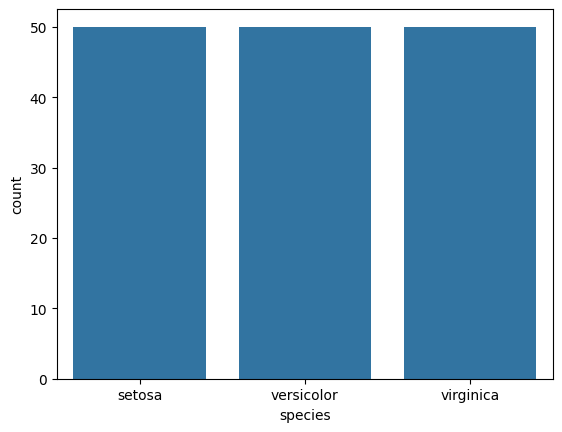

In [57]:
# Bar plot of species counts
sns.countplot(data=iris, x="species")

# Add more customizations to bar plot
# plt.figure(figsize=(8, 6))
# sns.countplot(data=iris, x="species", color="coral", edgecolor="black", linewidth=1)
# plt.title("Count of Each Species")
# plt.xlabel("Species")
# plt.ylabel("Count")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

<Axes: xlabel='count', ylabel='species'>

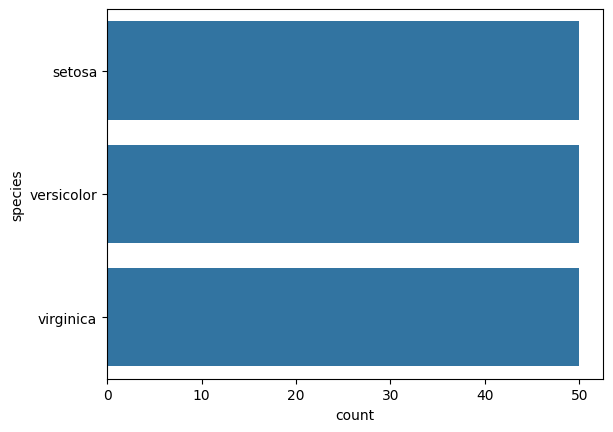

In [58]:
# Horizontal bar plot
sns.countplot(data=iris, y="species")

# Add more customizations to horizontal bar plot
# plt.figure(figsize=(8, 6))
# sns.countplot(data=iris, y="species", color="lightgreen", edgecolor="black", linewidth=1)
# plt.title("Count of Each Species (Horizontal)")
# plt.xlabel("Count")
# plt.ylabel("Species")
# plt.tight_layout()
# plt.show()

<Axes: xlabel='sepal_length', ylabel='Count'>

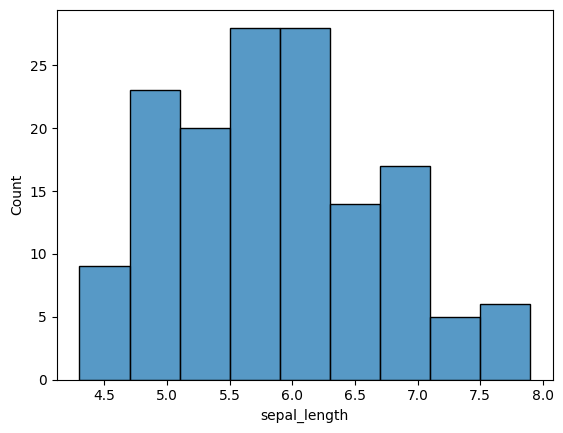

In [59]:
# Plot histogram for a single column
sns.histplot(data=iris, x="sepal_length")

# Add more customizations to histogram
# plt.figure(figsize=(8, 6))
# sns.histplot(data=iris, x="sepal_length", bins=20, color="skyblue", edgecolor="black")
# plt.title("Distribution of Sepal Length")
# plt.xlabel("Sepal Length (cm)")
# plt.ylabel("Frequency")
# plt.tight_layout()
# plt.show()

## Melting DataFrames

Seaborn works well with "long-form" data. You can use `pd.melt()` to reshape your DataFrame if needed.


In [60]:
iris_melt = iris.melt(
    id_vars=["species"],
    value_vars=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    var_name="feature",
    value_name="value",
)
iris_melt

,species,feature,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,petal_width,1.9
597,virginica,petal_width,2.0
598,virginica,petal_width,2.3


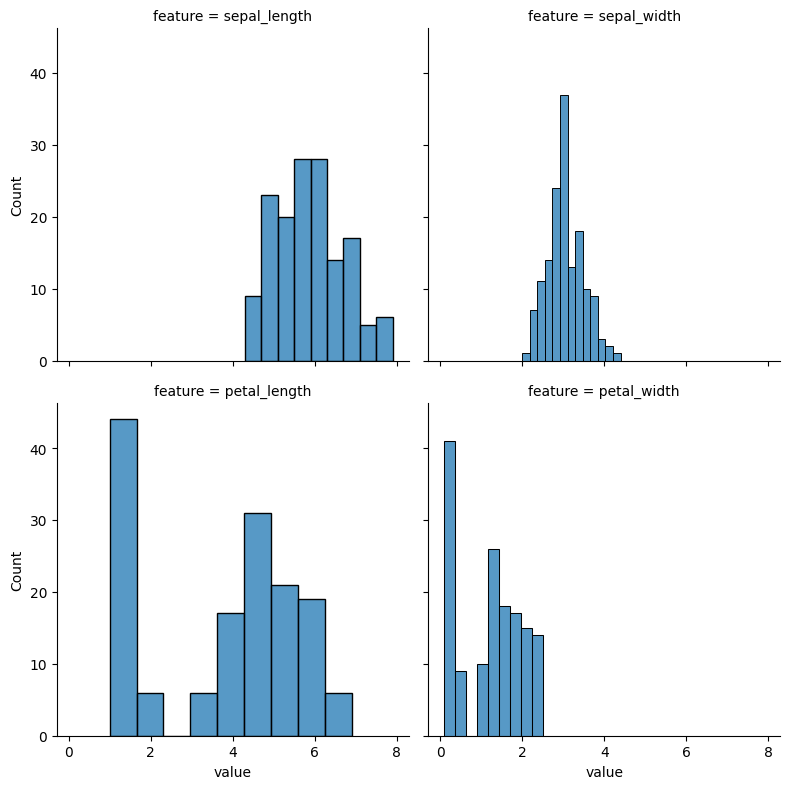

In [61]:
# Histogram plot for all numeric features using FacetGrid
g = sns.FacetGrid(iris_melt, col="feature", col_wrap=2, height=4)
g.map(sns.histplot, "value")

# Add more customizations to FacetGrid histograms
# g = sns.FacetGrid(iris_melt, col="feature", col_wrap=2, height=4)
# g.map(sns.histplot, "value", bins=15, color="lightblue", edgecolor="black")
# g.figure.suptitle("Histograms of Iris Features", y=1.02, fontsize=16)
# g.set_titles("{col_name}")
# g.set_axis_labels("Value", "Frequency")
# plt.tight_layout()
# plt.show()

<Axes: xlabel='feature', ylabel='value'>

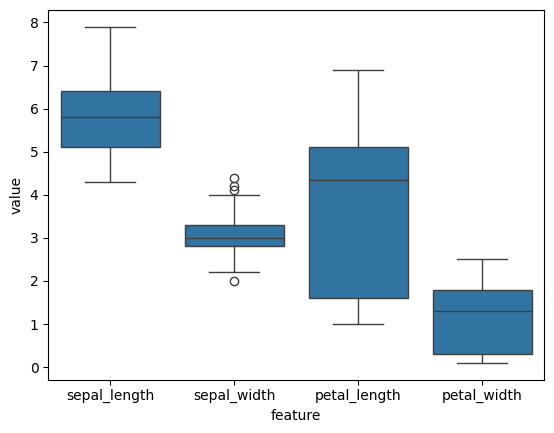

In [62]:
# Box plot for all numeric features
sns.boxplot(data=iris_melt, x="feature", y="value")

# Box plot for all numeric features separated by species
# sns.boxplot(data=iris_melt, x="feature", y="value", hue="species")

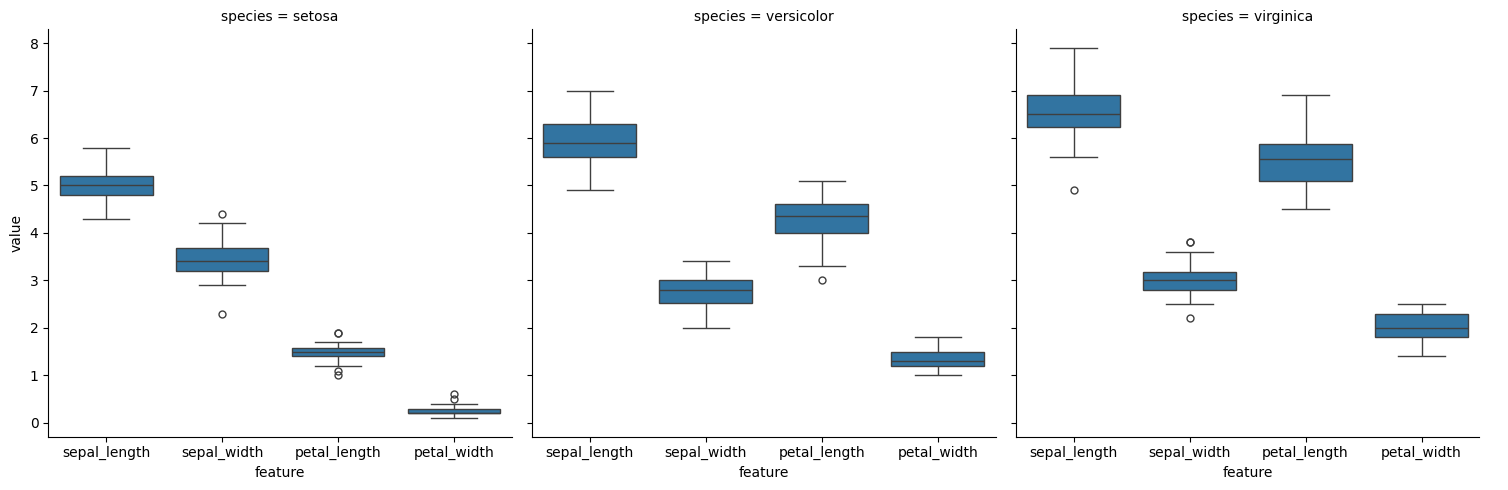

In [63]:
# Box plot for all numeric features using
g = sns.catplot(
    data=iris_melt,
    x="feature",
    y="value",
    col="species",
    kind="box",
)

# Add more customizations to box plots using catplot
# g = sns.catplot(
#     data=iris_melt,
#     x="feature",
#     y="value",
#     col="species",
#     kind="box",
#     col_wrap=2,
#     height=4,
#     aspect=1,
# )
# g.figure.suptitle("Box Plots of Iris Features by Species", y=1.02, fontsize=16)
# g.set_titles("{col_name}")
# g.set_axis_labels("Feature", "Value")
# plt.tight_layout()
# plt.show()

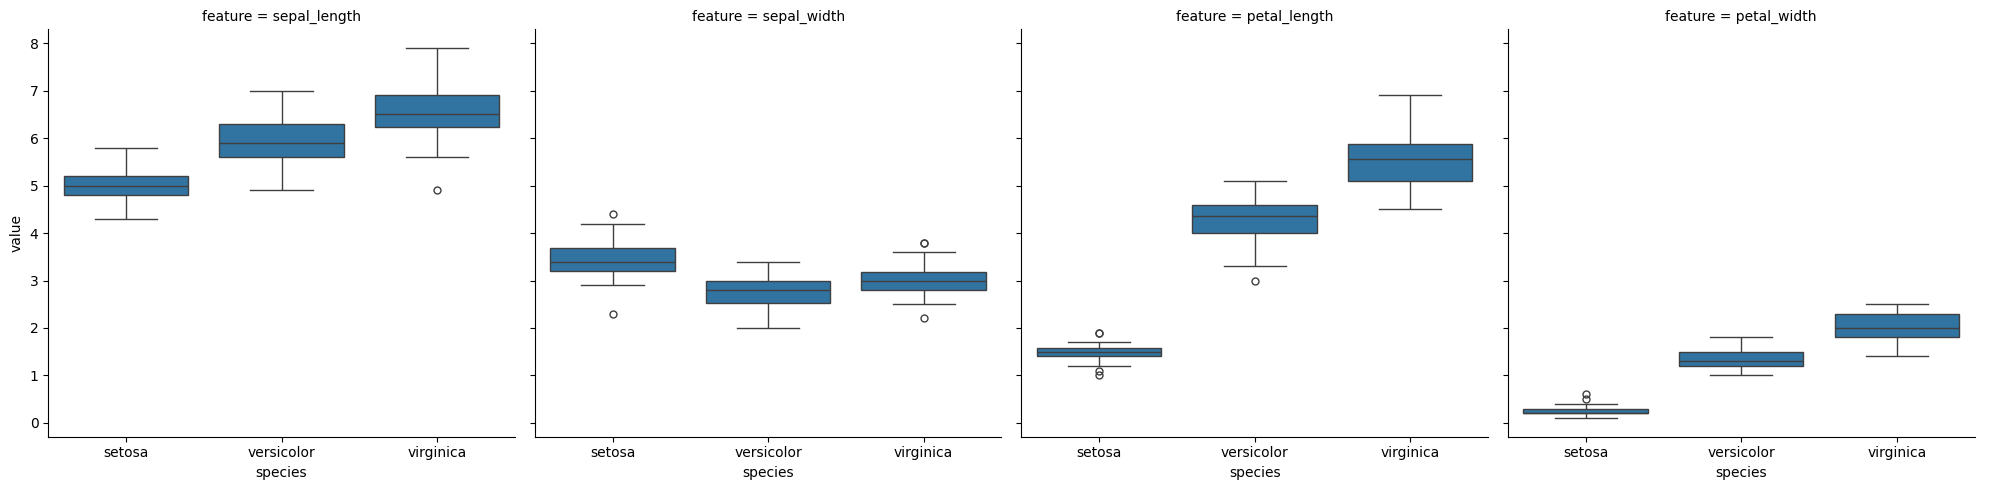

In [64]:
# Another way to slice data by species
g = sns.catplot(
    data=iris_melt,
    x="species",
    y="value",
    col="feature",
    kind="box",
)

# Add more customizations to box plots using catplot
# g = sns.catplot(
#     data=iris_melt,
#     x="species",
#     y="value",
#     col="feature",
#     kind="box",
#     col_wrap=2,
#     height=4,
#     aspect=1,
# )
# g.figure.suptitle("Box Plots by Species", y=1.02, fontsize=16)
# g.set_titles("{col_name}")
# g.set_axis_labels("Species", "Value (cm)")
# g.tight_layout()
# plt.show()


<Axes: xlabel='petal_length', ylabel='petal_width'>

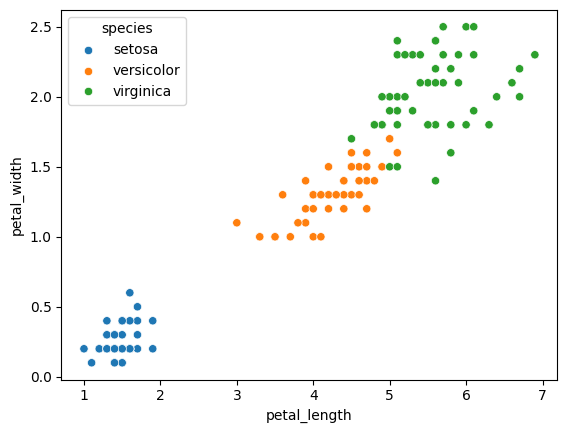

In [65]:
# Scatter plot with color by species
sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="species")

# Add more customizations to scatter plot
# colors = {"setosa": "red", "versicolor": "blue", "virginica": "green"}
# plt.figure(figsize=(8, 6))
# sns.scatterplot(
#     data=iris,
#     x="petal_length",
#     y="petal_width",
#     hue="species",
#     palette=colors,
#     alpha=0.6,
#     s=50,
# )
# plt.title("Petal Length vs Petal Width by Species")
# plt.xlabel("Petal Length (cm)")
# plt.ylabel("Petal Width (cm)")
# plt.tight_layout()
# plt.show()

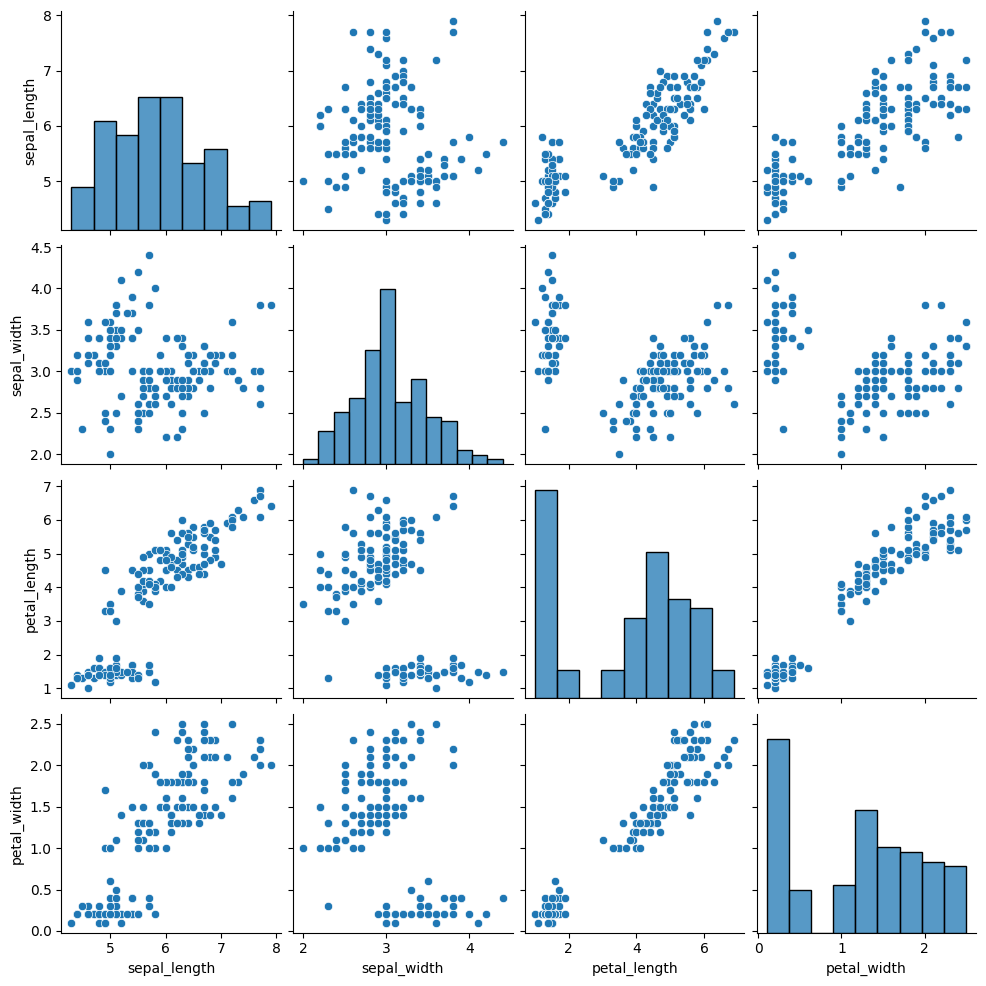

In [66]:
# Scatter matrix to see all pairwise relationships
# Note that I am not using the melted DataFrame here.
sns.pairplot(iris)

# g = sns.pairplot(
#     iris,
#     vars=["sepal_length", "sepal_width", "petal_length", "petal_width"],
#     hue="species",
#     diag_kind="hist",
#     height=2.5,
# )
# g.figure.suptitle("Scatter Matrix of Iris Features", y=1.02, fontsize=16)
# plt.show()

<Axes: xlabel='value', ylabel='Density'>

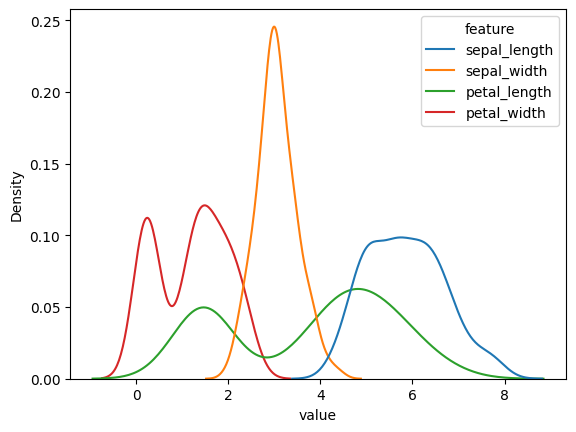

In [67]:
# Density plot for all numeric columns
sns.kdeplot(data=iris_melt, x="value", hue="feature")

# Add more customizations to density plot
# sns.kdeplot(
#     data=iris_melt,
#     x="value",
#     hue="feature",
#     fill=True,
#     common_norm=False,
#     alpha=0.4,
# )
# plt.title("Density Plot of Iris Features")
# plt.xlabel("Value (cm)")
# plt.ylabel("Density")
# plt.legend(loc="best")
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()